Коэффициент несинусоидальности = 1.0.
Дисперсия = 1658518.250700804.


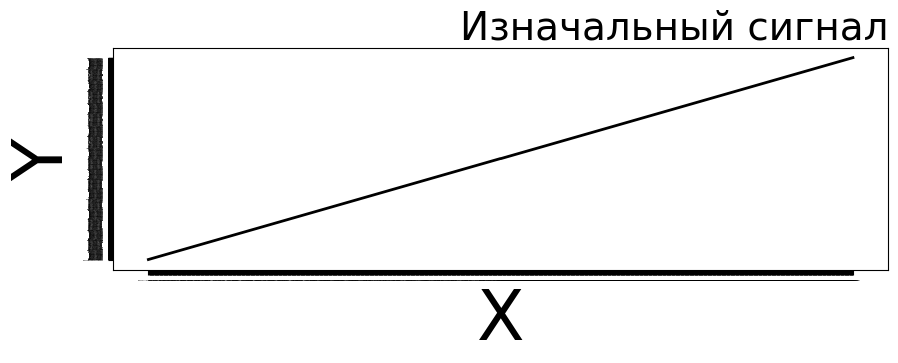

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


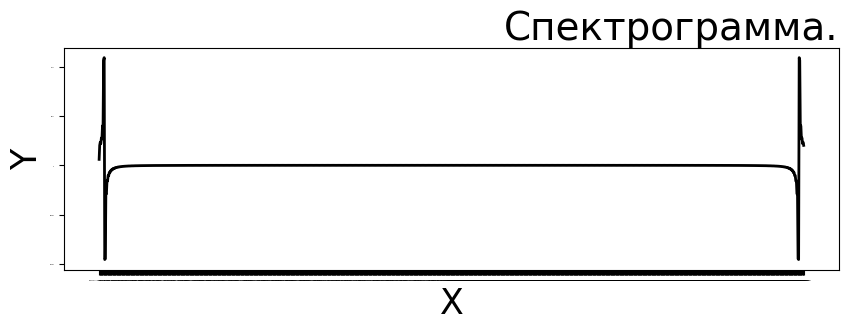

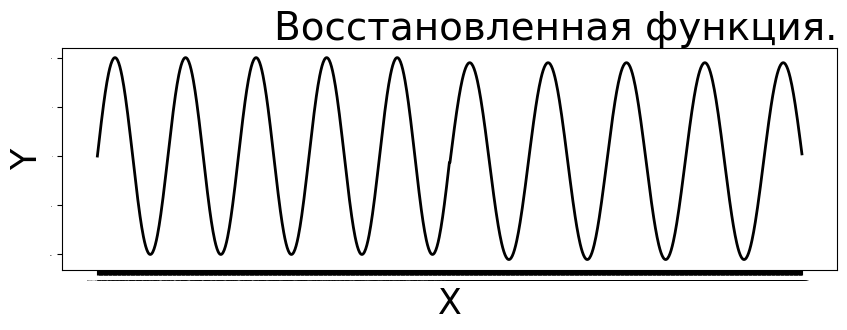

In [4]:
import numpy as np
import sympy
import pywt
from numpy import linalg as LA
from fractions import Fraction
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import webbrowser
import random
import copy
import csv
import time
import matplotlib.pyplot as plt
from matplotlib import rcParams

with open("2_sin_5_4.5.csv", newline='') as csvfile:
    reader = csv.reader(csvfile,delimiter=",")
    qwe=[]
    for row in reader:
        qwe.append(list(row))
for i in range(1,len(qwe)):
    qwe[i][0]=float(qwe[i][0])
    qwe[i][1]=float(qwe[i][1])
    
x = [qwe[i][0] for i in range(len(qwe))]
y = [qwe[i][1] for i in range(len(qwe))]
fi = list(fft(np.array(y)))
fi2 = list(ifft(fi))
pisinus = abs((max(fi)/(sum(fi)-max(fi))).real)
print(f'Коэффициент несинусоидальности = {pisinus}.')
dispersik = sum([(fi[i]-fi2[i])**2 for i in range(len(fi))]).real
print(f'Дисперсия = {dispersik}.')

plt.subplot(3, 1, 1)
plt.plot(x,y,color='black',lw=2)
plt.title(f'Изначальный сигнал',fontsize=28, loc = 'right')
plt.tick_params(labelsize = 1)
plt.xlabel('X',fontsize=50)
plt.ylabel('Y',fontsize=50)
plt.show()

plt.subplot(3, 1, 2)
plt.plot(x,fi,color='black',lw=2)
plt.title(f'Спектрограмма.',fontsize=28, loc = 'right')
plt.tick_params(labelsize = 1)
plt.xlabel('X',fontsize=25)
plt.ylabel('Y',fontsize=25)
plt.show()

plt.subplot(3, 1, 3)
plt.plot(x,fi2,color='black',lw=2)
plt.title(f'Восстановленная функция.',fontsize=28, loc = 'right')
plt.tick_params(labelsize = 1)
plt.xlabel('X',fontsize=25)
plt.ylabel('Y',fontsize=25)
plt.show()

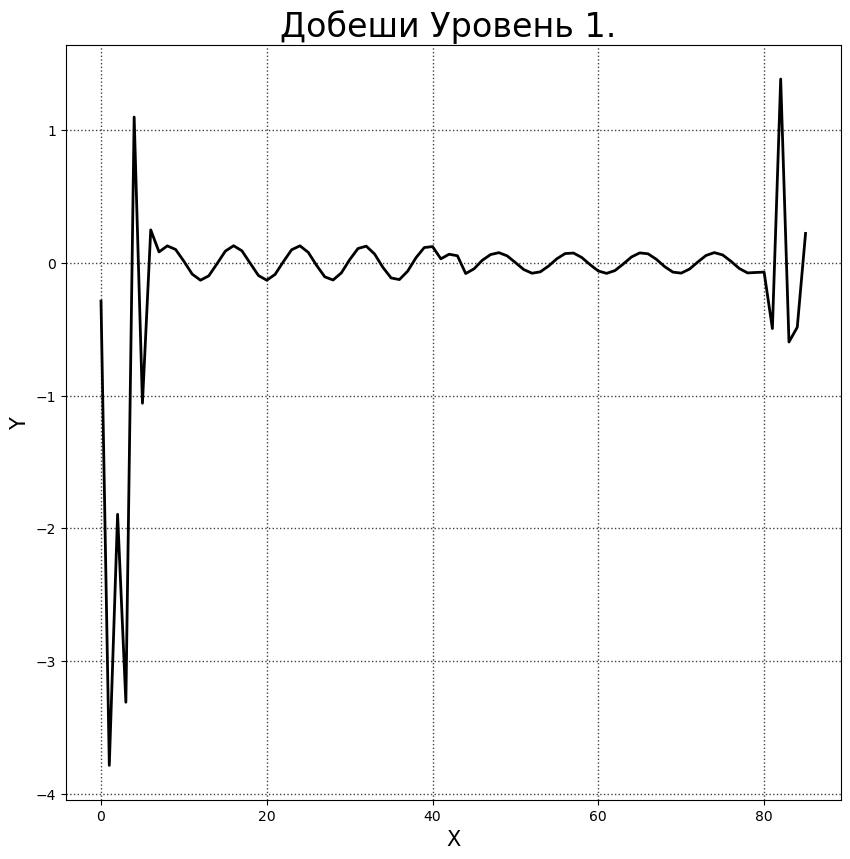

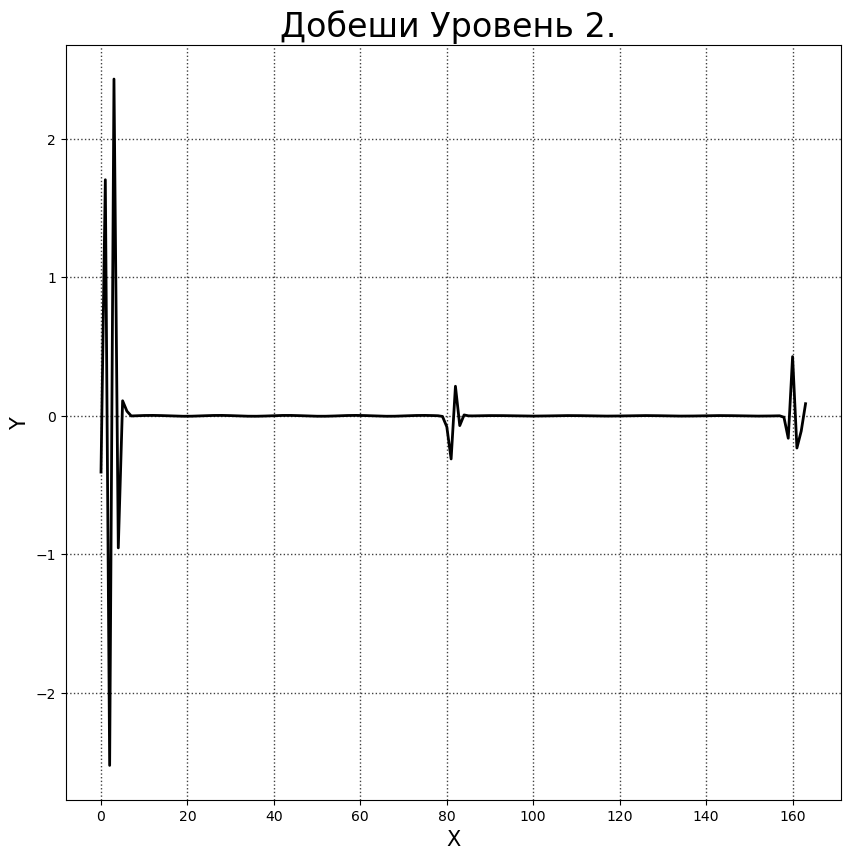

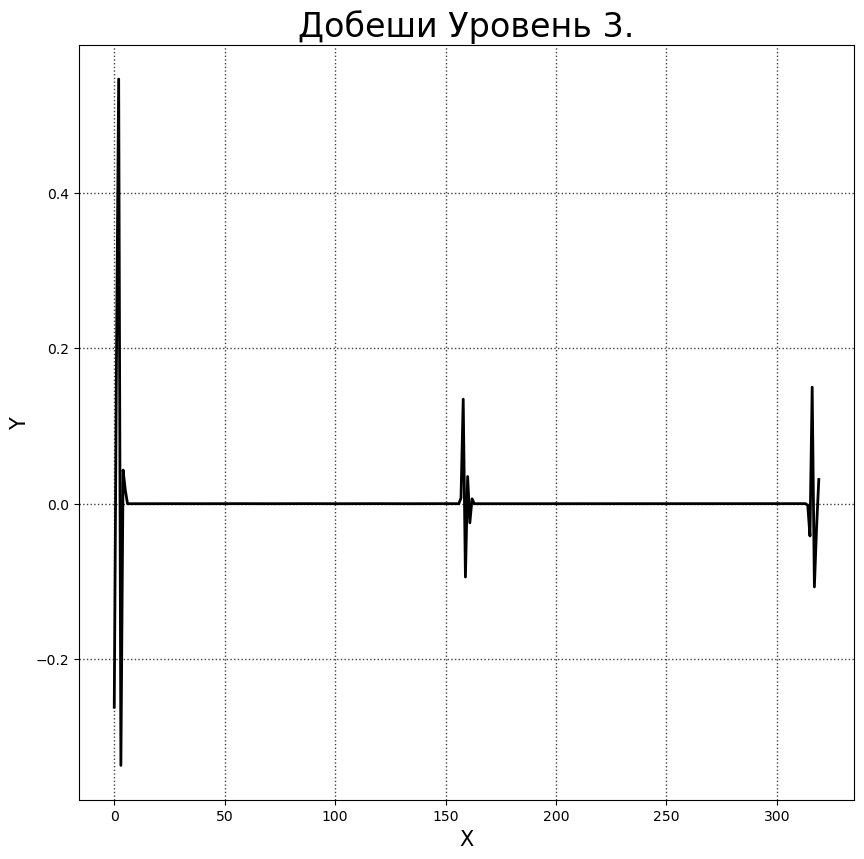

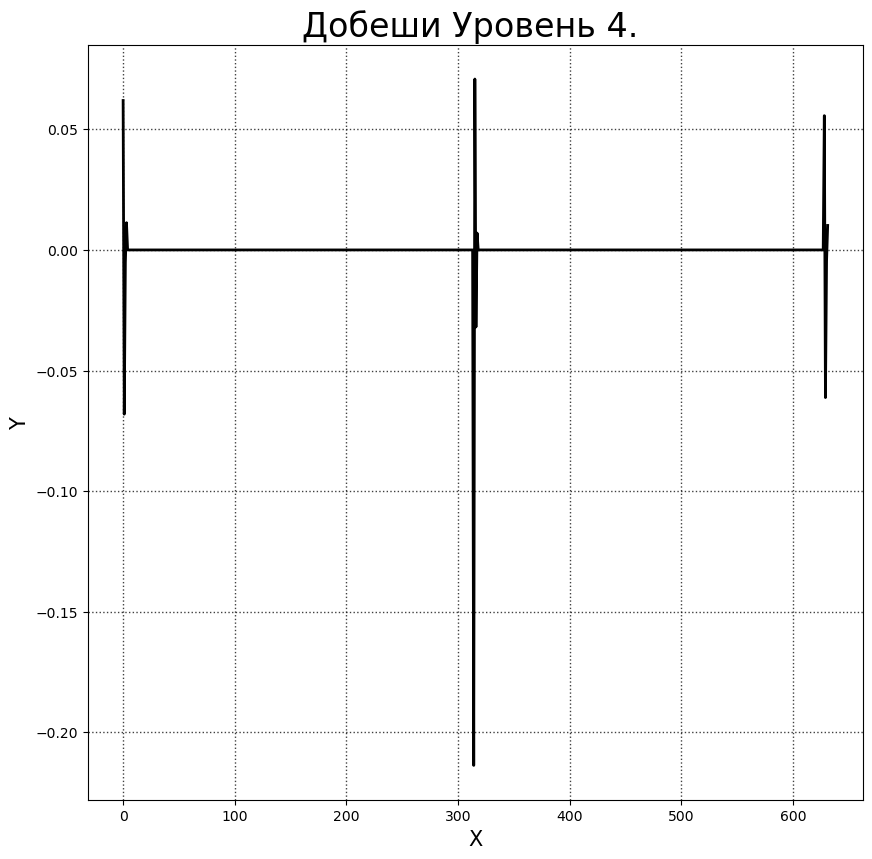

Коэффициент несинусоидальности: 0.036992689854062275.


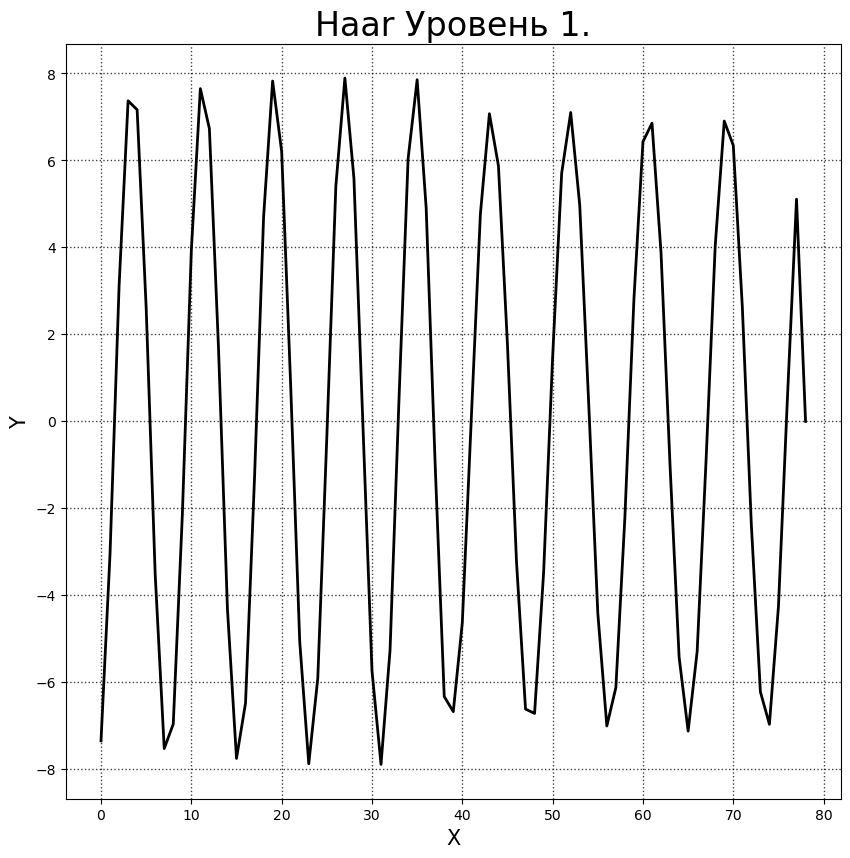

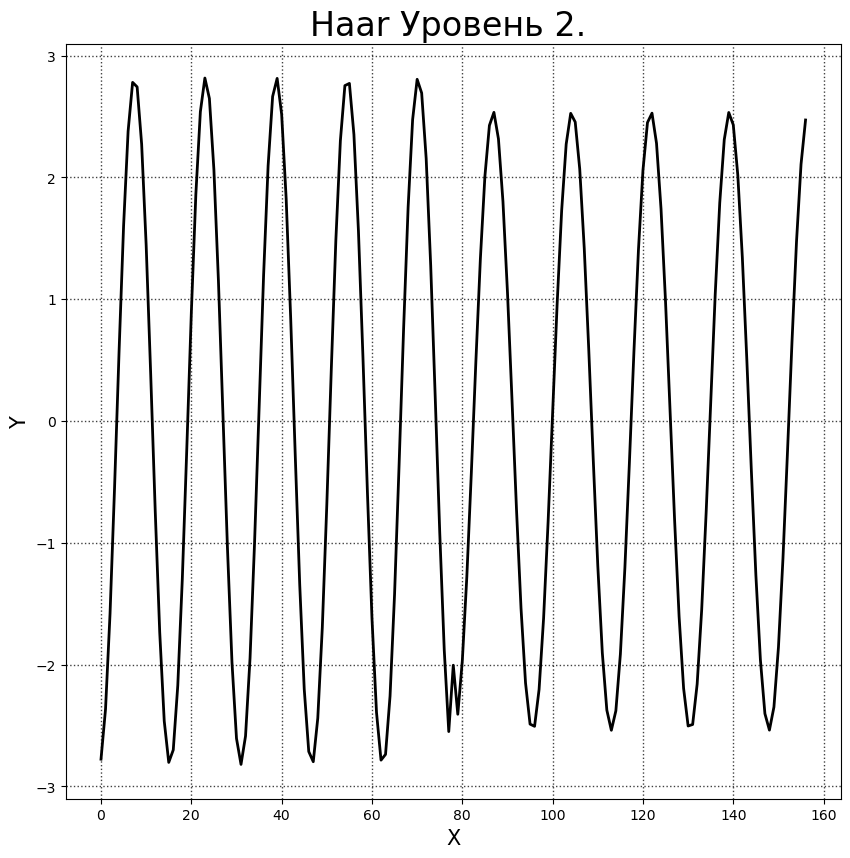

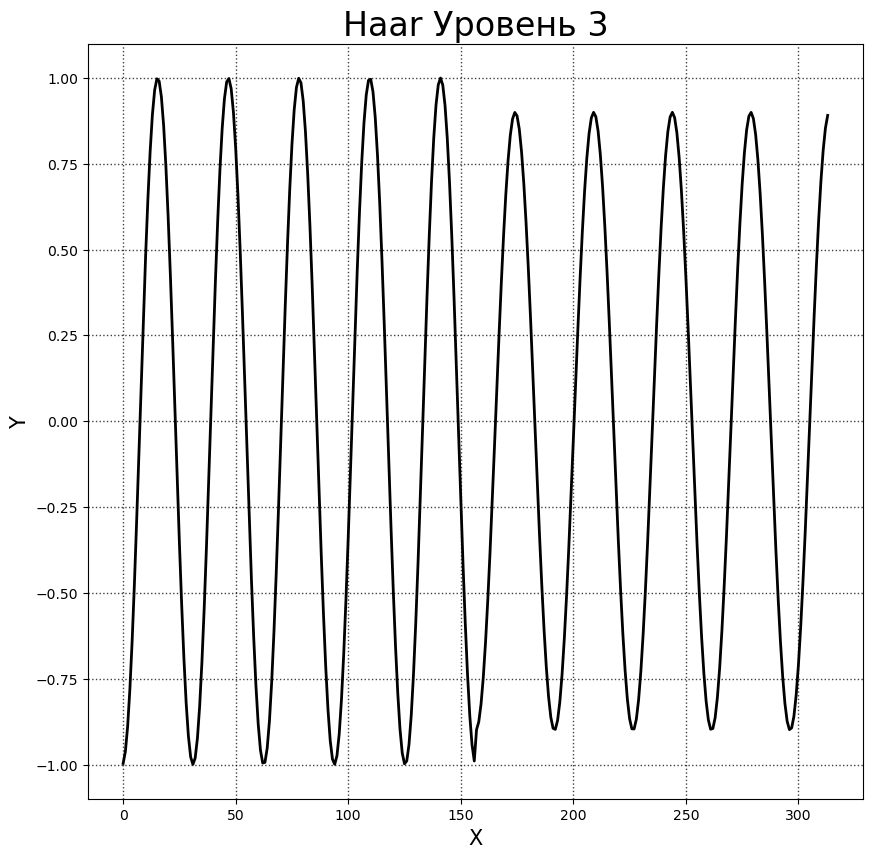

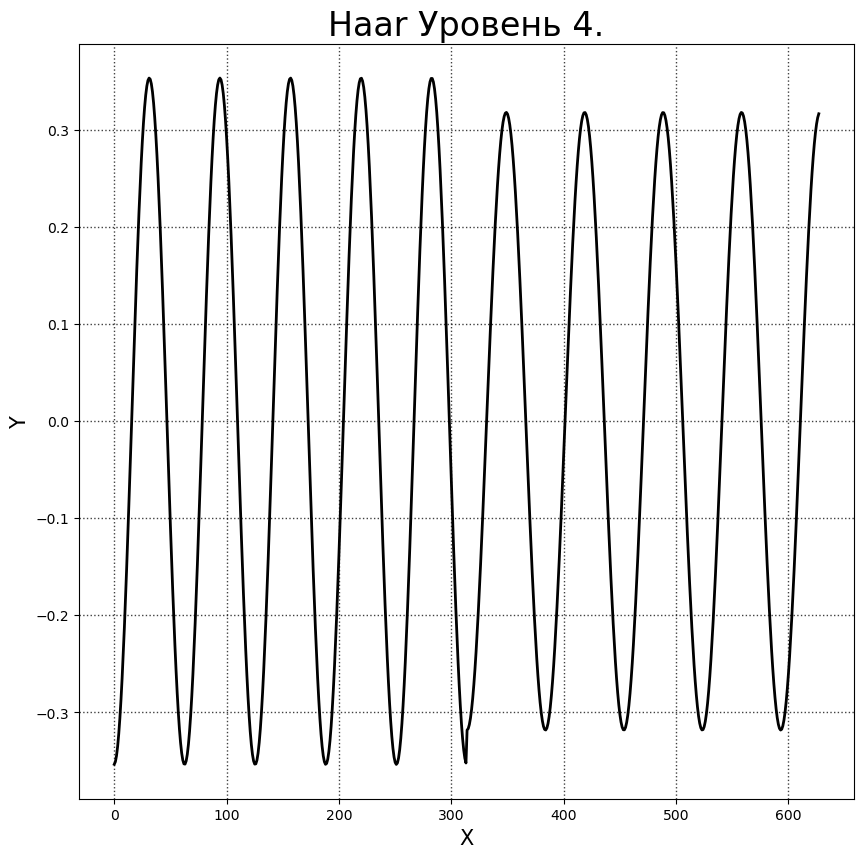

Коэффициент несинусоидальности: 0.1033338002383901.


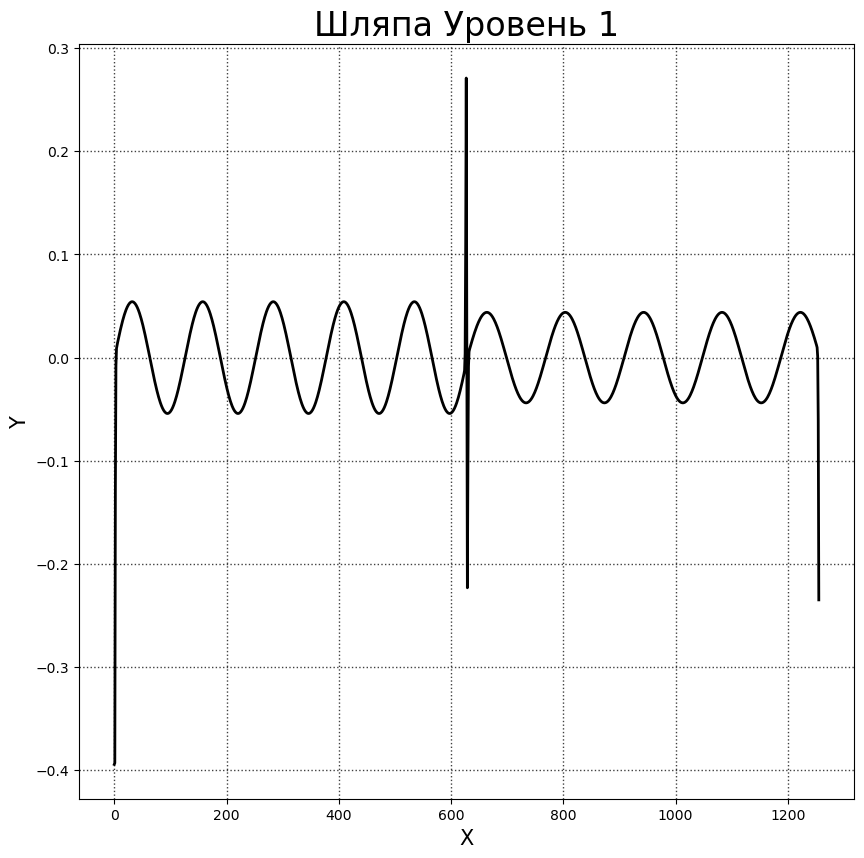

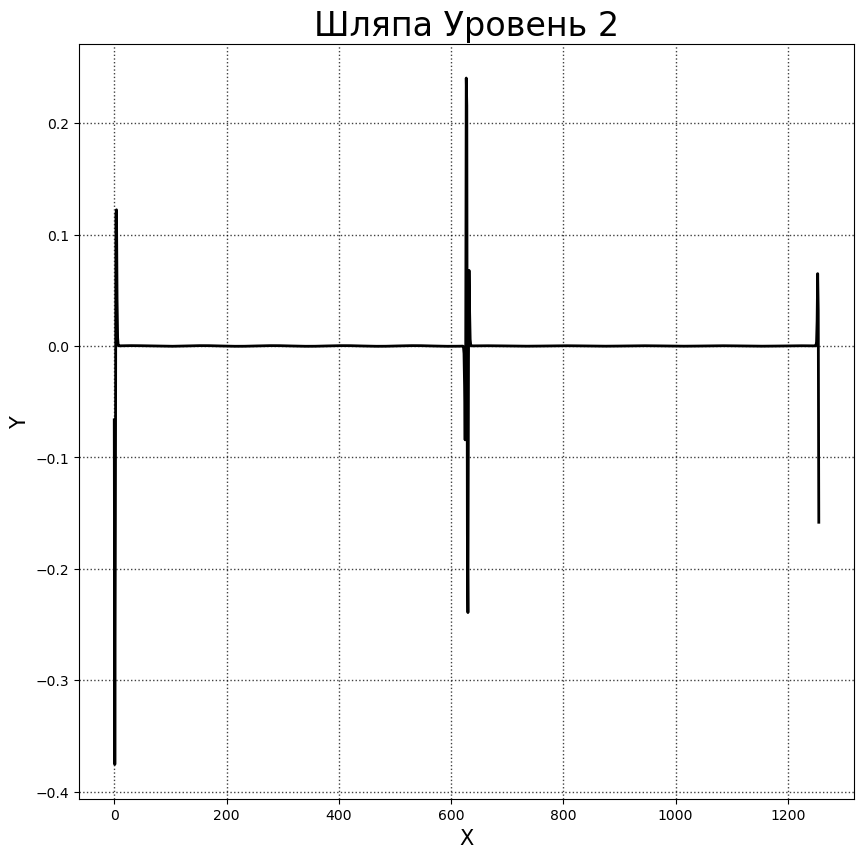

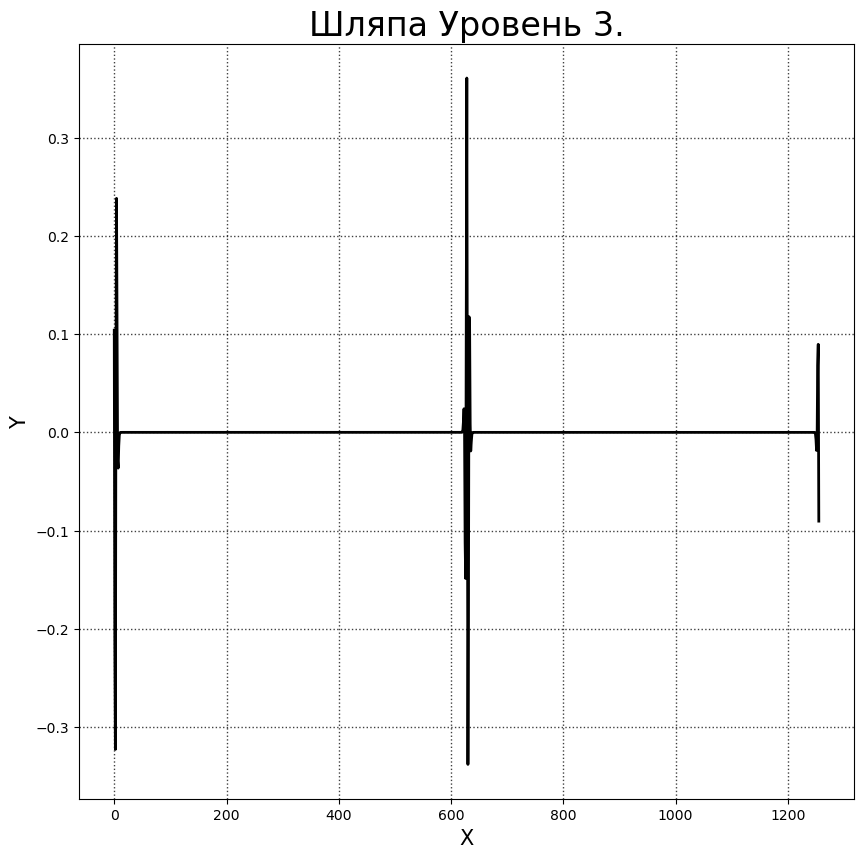

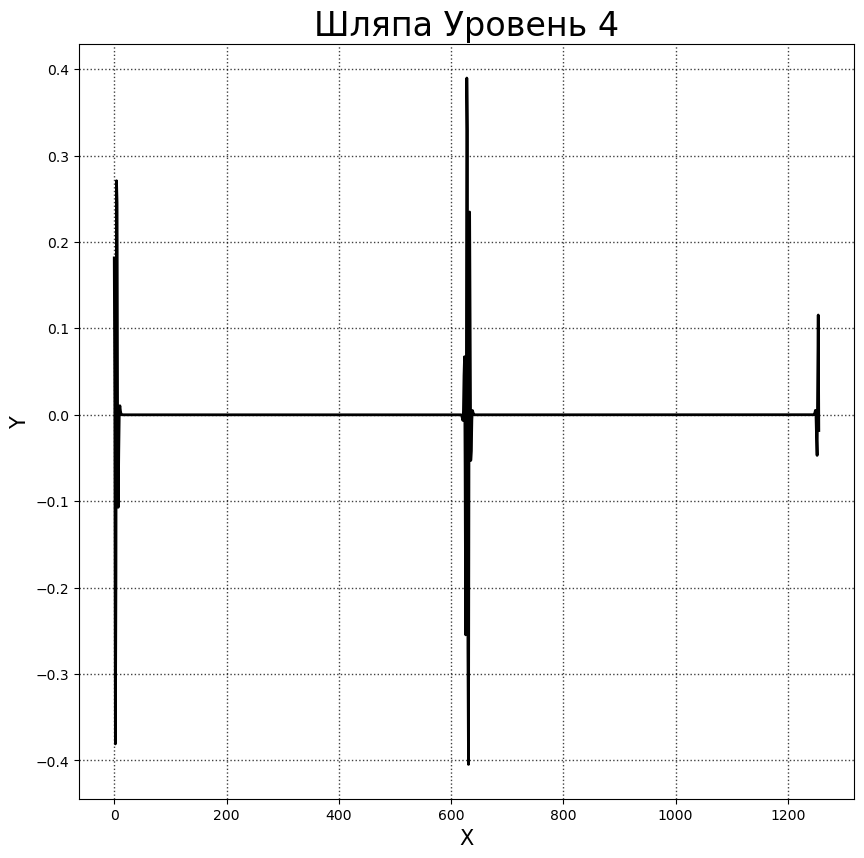

Коэффициент несинусоидальности: 48.21975575346945.


In [8]:
def wavelet_sinus(coeffs):
    a4, d4, d3, d2, d1 = coeffs
    result = np.sqrt(np.std(d4) + np.std(d3) + np.std(d2) + np.std(d1)) / np.std(a4)
    return result

coeffs = pywt.wavedec(y, 'db5', level=4)

# Уровень 1

rcParams['figure.figsize'] = (10, 10)
rcParams['figure.dpi'] = 100

plt.plot(coeffs[-4], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Добеши Уровень 1. ', fontsize=24, loc='center')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

# Уровень 2


plt.plot(coeffs[-3], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Добеши Уровень 2. ', fontsize=24, loc='center')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

# Уровень 3


plt.plot(coeffs[-2], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Добеши Уровень 3.', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

# Уровень 4


plt.plot(coeffs[-1], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Добеши Уровень 4. ', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

print(f'Коэффициент несинусоидальности: {wavelet_sinus(coeffs)}.')

x = [i[0] for i in qwe]
y = [i[1] for i in qwe]
coeffs = pywt.wavedec(y, 'haar', level=4)

plt.plot(coeffs[-4], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Haar Уровень 1.', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

plt.plot(coeffs[-3], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Haar Уровень 2. ', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

plt.plot(coeffs[-2], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Haar Уровень 3', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

plt.plot(coeffs[-1], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Haar Уровень 4.', fontsize=24, loc='center')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

print(f'Коэффициент несинусоидальности: {wavelet_sinus(coeffs)}.')

x = [i[0] for i in qwe]
y = [i[1] for i in qwe]
wavelet = pywt.ContinuousWavelet('mexh')
coef, freqs = pywt.cwt(y, np.arange(1, 30), wavelet)
endcoef = []
endcoef.append(coef[0])

plt.plot(coef[0], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Шляпа Уровень 1', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()
coef, freqs = pywt.cwt(coef[0], np.arange(1, 30), wavelet)

plt.plot(coef[0], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Шляпа Уровень 2', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()
coef, freqs = pywt.cwt(coef[0], np.arange(1, 30), wavelet)
endcoef.append(coef[0])

plt.plot(coef[0], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Шляпа Уровень 3.', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()
coef, freqs = pywt.cwt(coef[0], np.arange(1, 30), wavelet)
endcoef.append(coef[0])

plt.plot(coef[0], color='black', lw=2)
plt.grid(b=True, color='black', alpha=0.75, linestyle=':', linewidth=1)
plt.title(f'Шляпа Уровень 4', fontsize=24, loc='center')

plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()
coef, freqs = pywt.cwt(coef[0], np.arange(1, 30), wavelet)
endcoef.append(coef[0])

endcoef.append(np.sqrt(np.var(coef[-1])))
endcoef.reverse()
coefsin = np.sqrt(np.std(endcoef[1]) + np.std(endcoef[2]) + np.std(endcoef[3]) + np.std(endcoef[4])) / endcoef[0]
print(f'Коэффициент несинусоидальности: {coefsin}.')